# Lecture 4: Neural Network Learning Part 2

2/21/2023

## Gradient Descent Learning

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Function Definitions for Plotting

In [2]:
# plot data points
def plot_fun(features, labels, classes):
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
        features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-1, 2, -1, 2])
    plt.title('Raw Data Plot For Both Classes')
    plt.xlabel('X: Feature 1')
    plt.ylabel('Y: Feature 2')
    plt.legend(['Class ' + str(classes[0]), 'Class ' + str(classes[1])])
    plt.show()

# plot separating line: w1x1 + w2x2 + w0 = 0
def plot_fun_thr(features, labels, thresholdParams, classes = [0, 1]):
    # plot data points
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
        features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-1, 2, -1, 2])
    # plot separating line
    x1 = np.linspace(-1, 2, 50)
    # w1x1 + w2x2 + w0 = 0 => x2 = -(w1x1 + w0) / w2
    x2 = -(thresholdParams[1] * x1 + thresholdParams[0]) / thresholdParams[2]
    plt.plot(x1, x2, '-b')
    plt.xlabel('X: Feature 1')
    plt.ylabel('Y: Feature 2')
    plt.legend(['Class ' + str(classes[0]), 'Class ' + str(classes[1])])
    #plt.pause(0.5)
    plt.show()

def plot_cost_func(J, iterations):
    # Plot learning curve
    x = np.arange(iterations, dtype = int)
    y = J
    plt.plot(x, y)
    plt.axis([-1, x.shape[0] + 1, -0.1, np.max(y) + 0.1])
    plt.title('Learning Curve')
    plt.xlabel('X_1: Iteration Number')
    plt.ylabel('X_2: J(Theta)')
    plt.show()

### Class For Defining Neural Network Objects

In [3]:
class NeuralNetwork(object):

    def __init__(self):
        # using seed to make sure same weights are generated w/ each run
        np.random.seed(1)
        # 3x1 weight matrix
        # Random Weights between -1 and 1
        self.weight_matrix = np.random.random((3, 1)) - 1
        # initialize learning rate
        self.l_rate = 1

    # sigmoid as activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Calculate Local Field
    def forward_propagation(self, inputs):
        outs = np.dot(inputs, self.weight_matrix)
        return self.sigmoid(outs)

    def train_GDL(self, train_inputs, train_outputs, num_train_iterations = 1000, lr=1):
        N = train_inputs.shape[0]
        self.l_rate = lr
        cost_func = np.array([])
        
        print("Classification Line Based on Initial Weights:")
        plot_fun_thr(train_inputs[:, 1:3], train_outputs[:, 0], self.weight_matrix[:, 0]) #, classes) <= OPTIONAL
        # Perform number of iterations for this input set
        for iteration in range(num_train_iterations):
            
            outputs = self.forward_propagation(train_inputs)
            # Calculate error in output
            error = train_outputs - outputs
            adjustment = (self.l_rate / N) * np.sum(np.multiply(error, train_inputs), axis = 0)

            # Calculate Cost Function
            cost_func = np.append(cost_func, (1 / (2 * N)) * np.sum(np.power(error, 2)))
            # Adjust the weight matrix
            self.weight_matrix[:, 0] += adjustment
            # Plot Separating line based on weights
            print('Iteration # '+ str(iteration + 1))
            plot_fun_thr(train_inputs[:, 1:3], train_outputs[:, 0], self.weight_matrix[:, 0]) #, classes) # OPTIONAL

        plot_cost_func(cost_func, num_train_iterations)

    # Predicting Classes of New Data Points
    def pred(self, inputs):
        prob = self.forward_propagation(inputs)
        preds = np.int8(prob >= 0.5)
        return preds

### Create Features and Labels For Training:

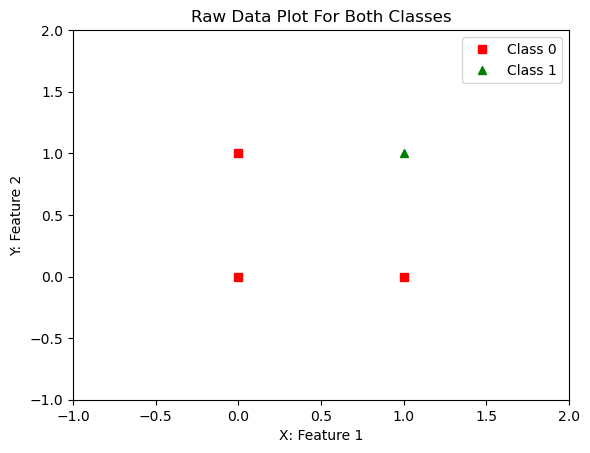

In [4]:
features = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])
classes = [0, 1]

plot_fun(features, labels, classes)

### Create Bias Vector & Append to Features Vector

In [5]:
bias = np.ones((features.shape[0], 1))
features = np.append(bias, features, axis = 1)
print('Features Vector Including Bias:')
print(features, '\n')

print(f'Shape of Features: {features.shape}')

Features Vector Including Bias:
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]] 

Shape of Features: (4, 3)


### Declare Object and Train:

Random Weights At Start of Training:
[[-0.582978  ]
 [-0.27967551]
 [-0.99988563]] 

Labels as a Single Row:
[0 0 0 1] 

Labels as a Single Column:
[[0]
 [0]
 [0]
 [1]] 

Classification Line Based on Initial Weights:


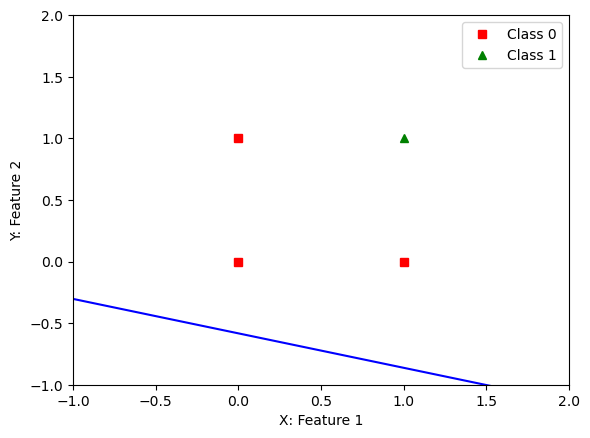

Iteration # 1


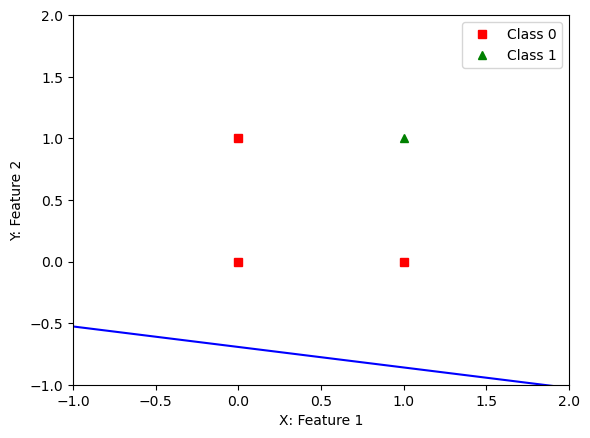

Iteration # 2


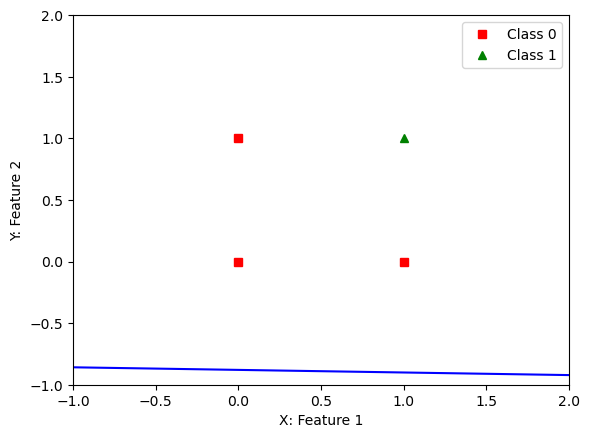

Iteration # 3


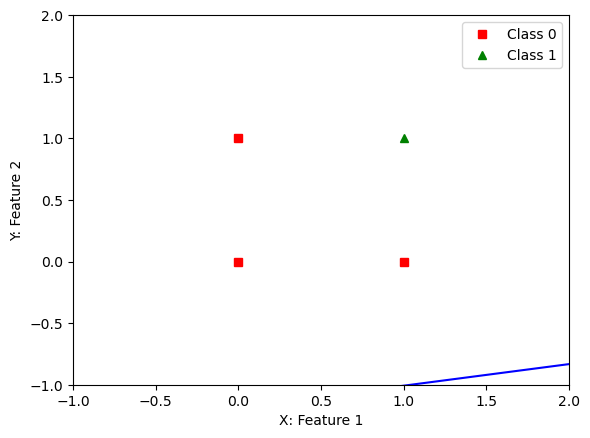

Iteration # 4


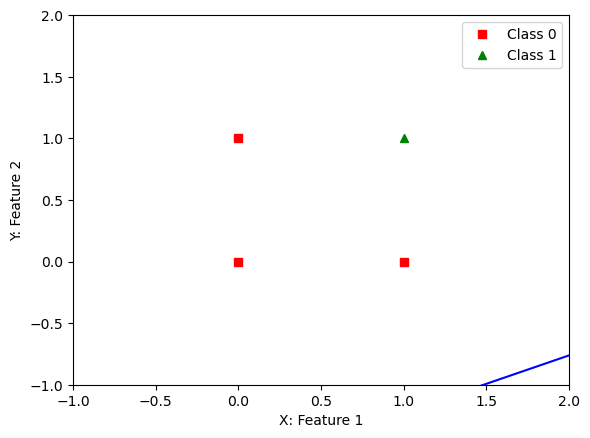

Iteration # 5


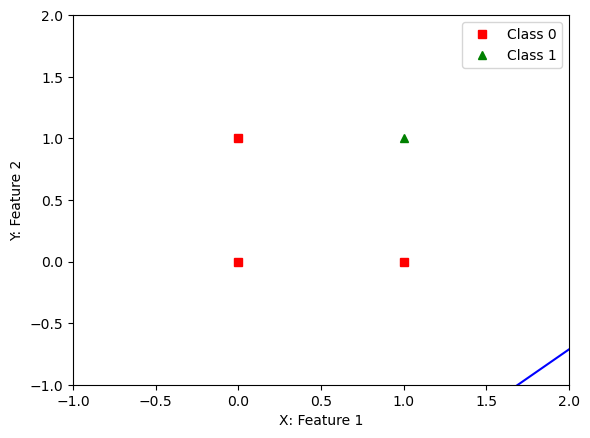

Iteration # 6


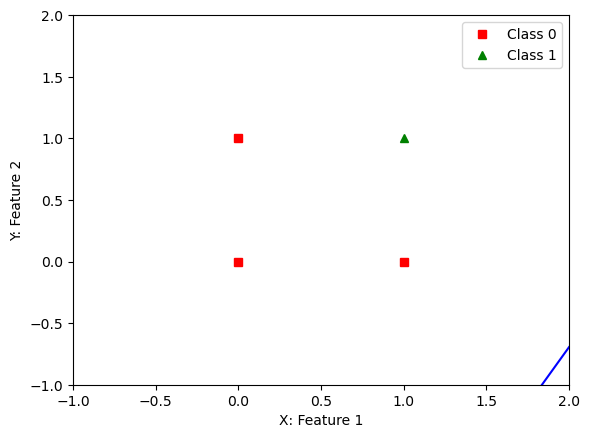

Iteration # 7


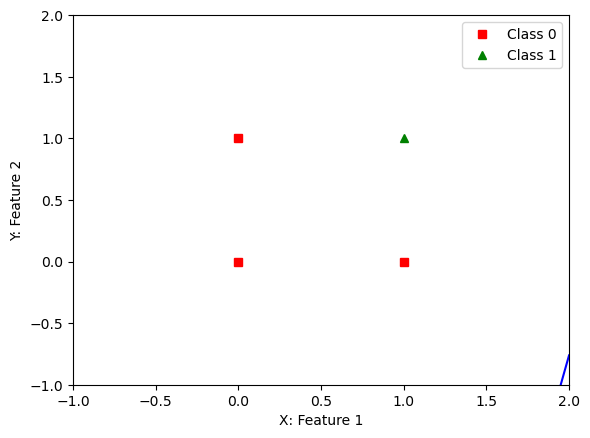

Iteration # 8


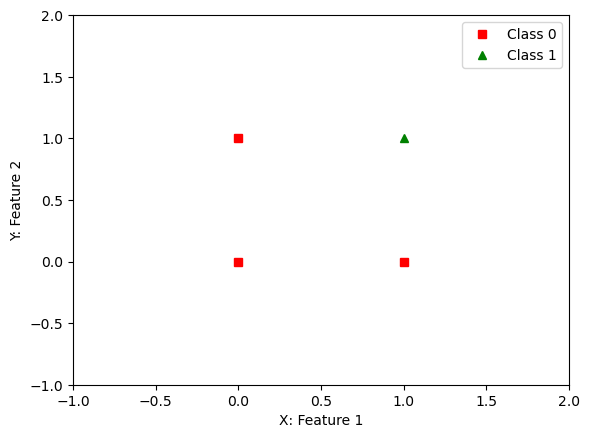

Iteration # 9


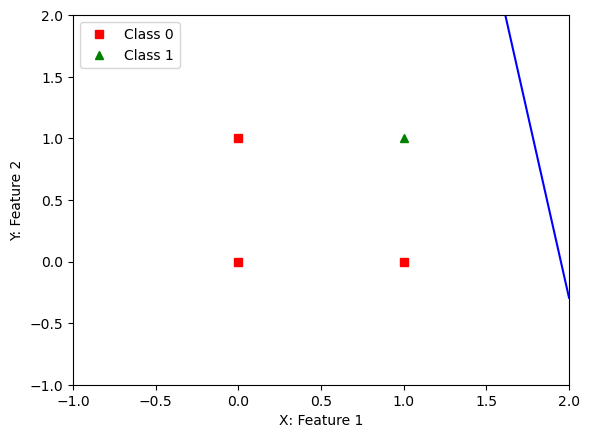

Iteration # 10


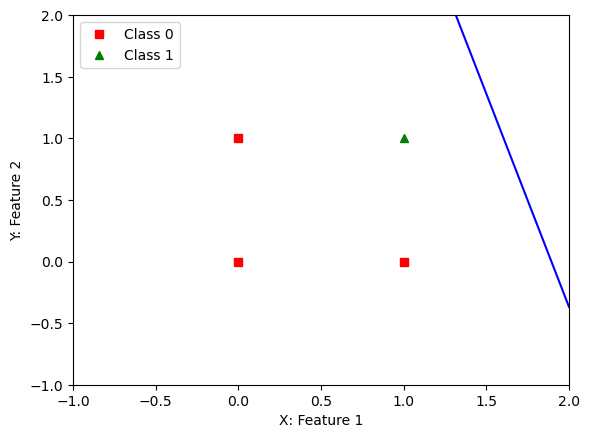

Iteration # 11


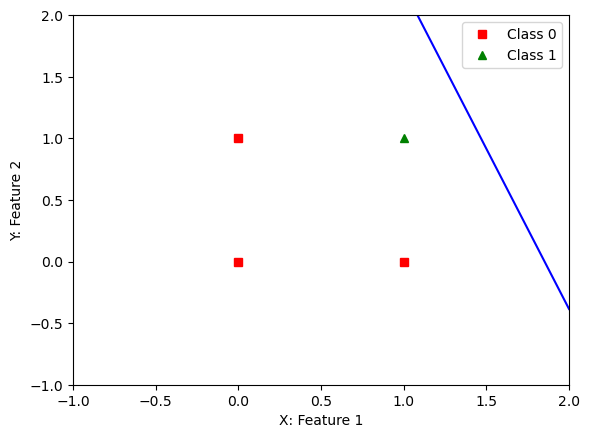

Iteration # 12


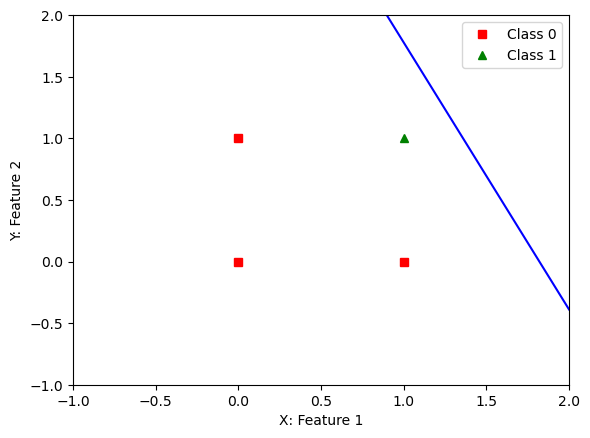

Iteration # 13


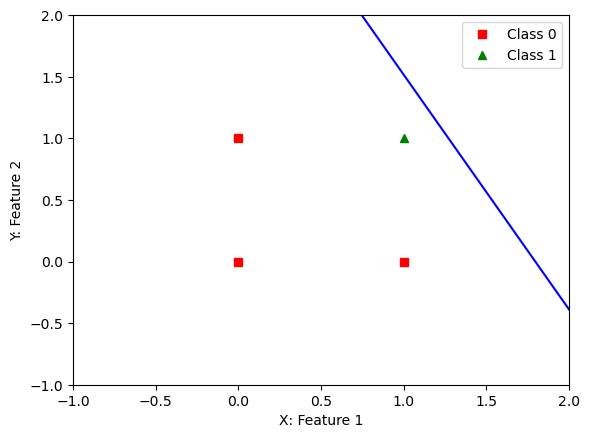

Iteration # 14


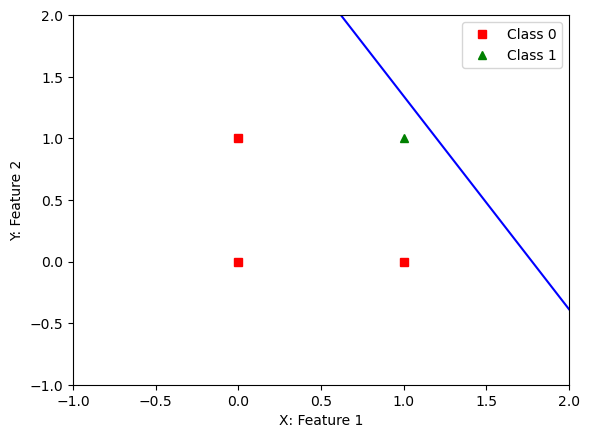

Iteration # 15


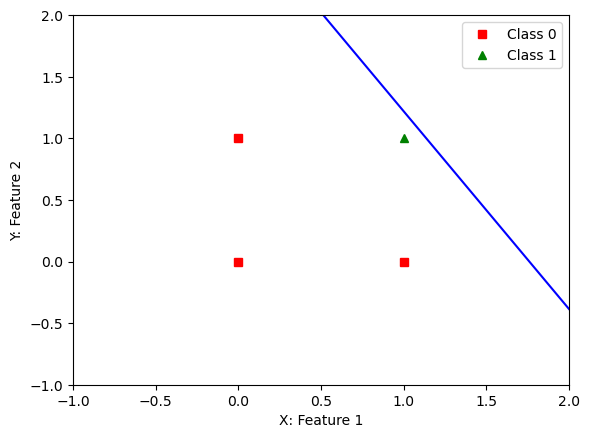

Iteration # 16


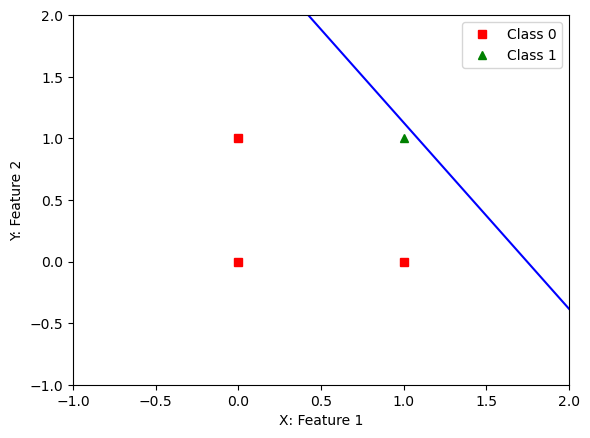

Iteration # 17


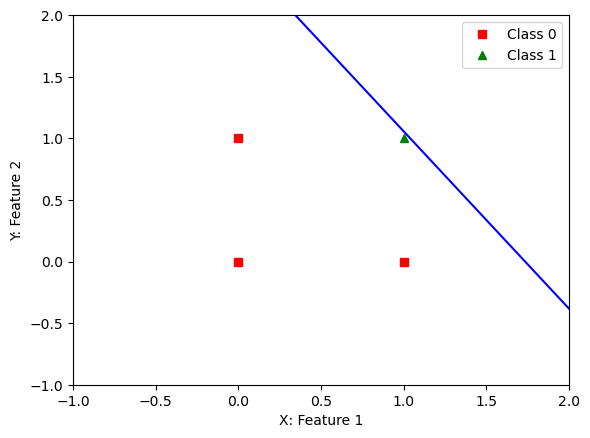

Iteration # 18


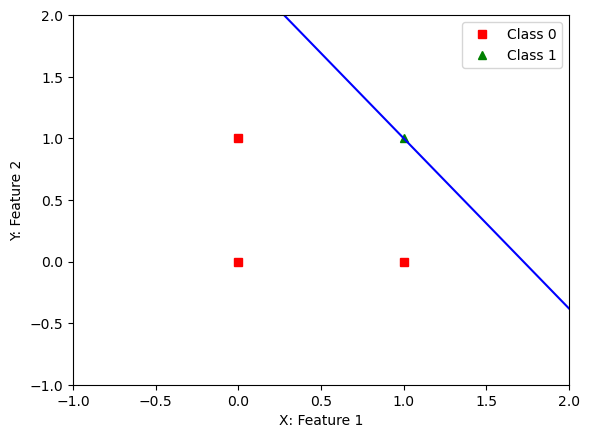

Iteration # 19


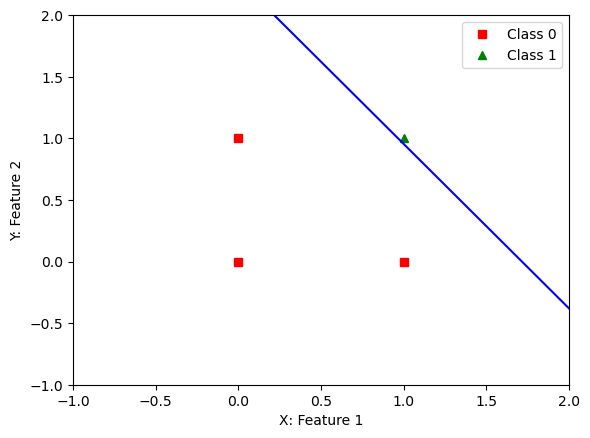

Iteration # 20


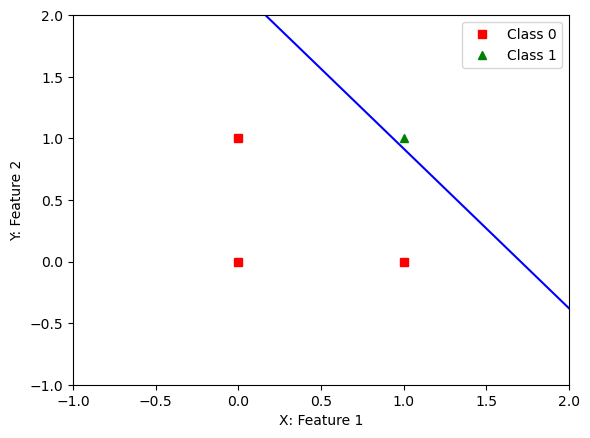

Iteration # 21


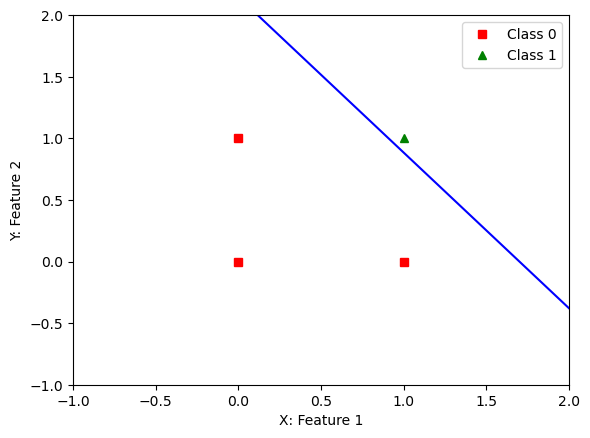

Iteration # 22


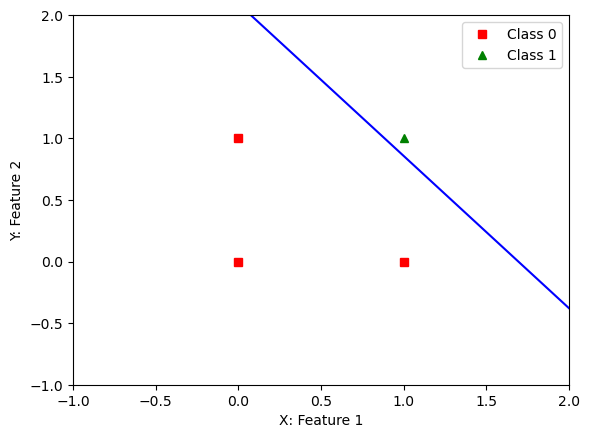

Iteration # 23


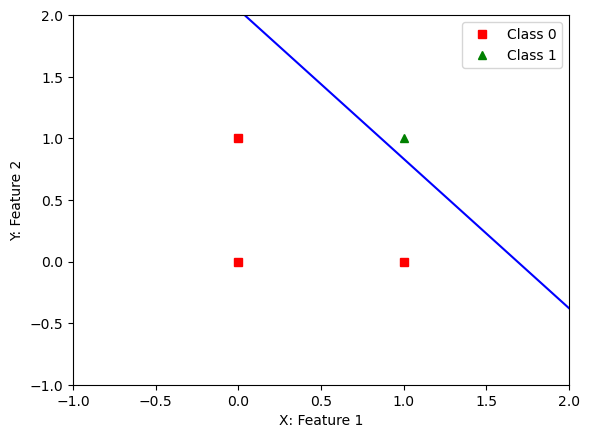

Iteration # 24


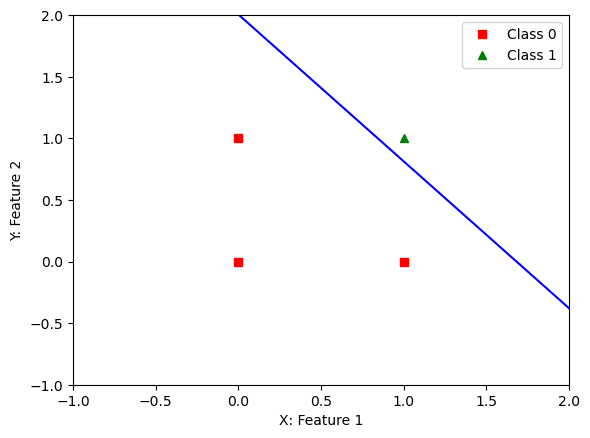

Iteration # 25


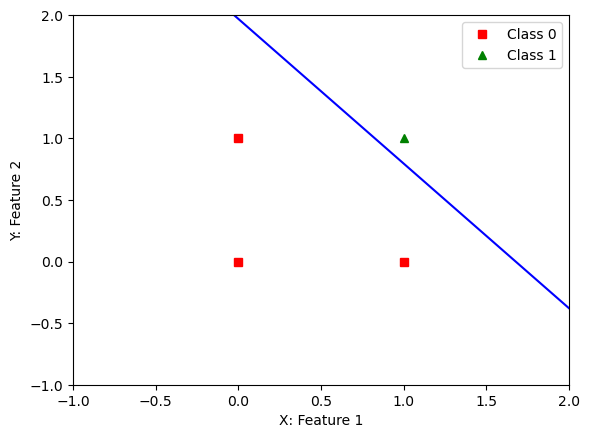

Iteration # 26


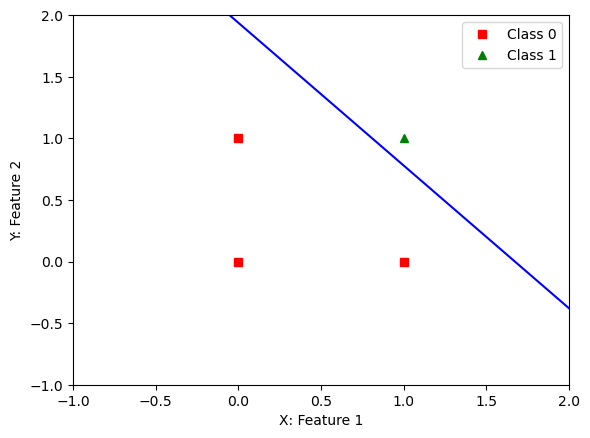

Iteration # 27


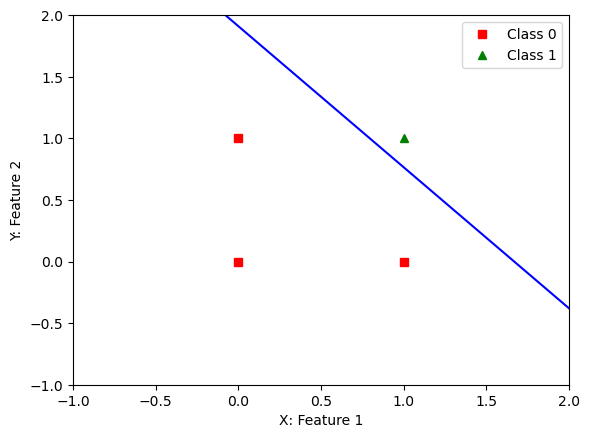

Iteration # 28


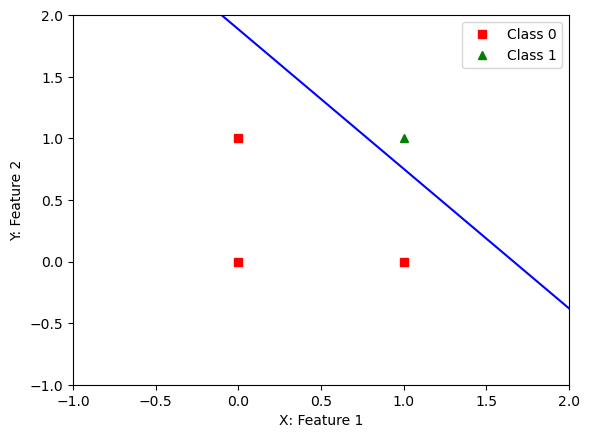

Iteration # 29


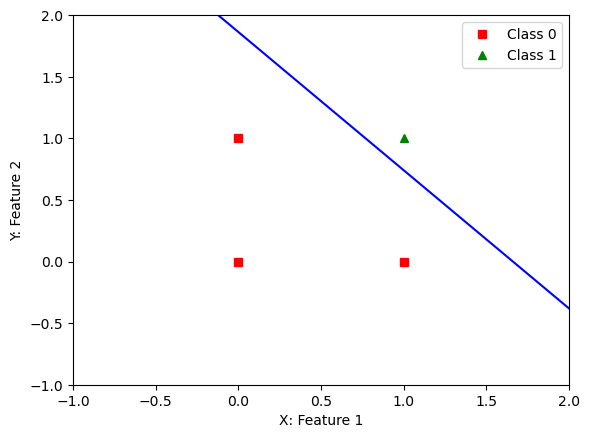

Iteration # 30


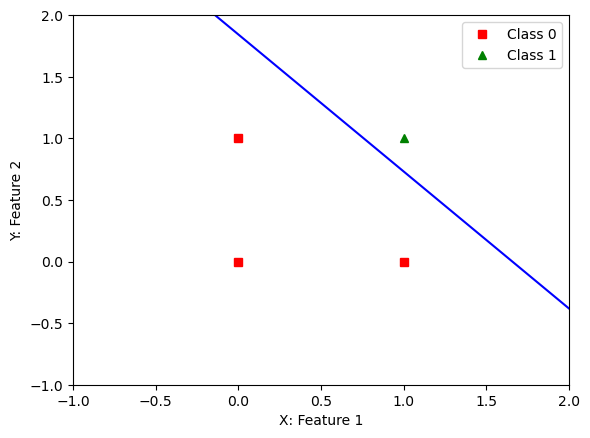

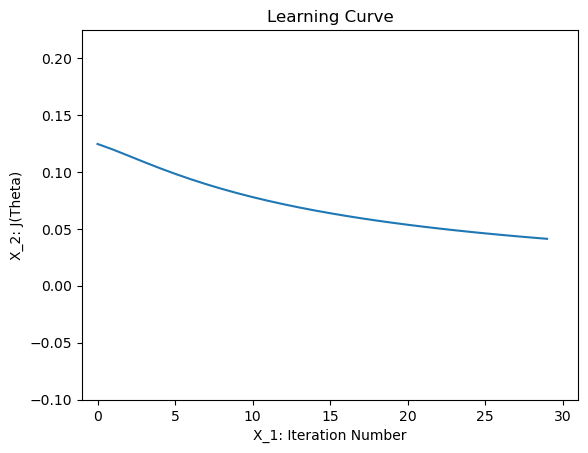

New Weights After Training:
[[-2.38258538]
 [ 1.43796762]
 [ 1.29282457]]


In [6]:
neural_network = NeuralNetwork()
print('Random Weights At Start of Training:')
print(neural_network.weight_matrix, '\n')

print('Labels as a Single Row:')
print(labels, '\n')

print('Labels as a Single Column:')
print(np.expand_dims(labels, axis = 1), '\n')

neural_network.train_GDL(features, np.expand_dims(labels, axis = 1), 30, 1)

print('New Weights After Training:')
print(neural_network.weight_matrix)

### Test Neural Network With Specific Data Points:

In [7]:
print('Test Neural Network on Training Data Points:')
print(neural_network.pred(features), '\n')

print('Test Neural Network With New Data Points')
print(neural_network.pred(np.array([1, 1, 1])))

Test Neural Network on Training Data Points:
[[0]
 [0]
 [0]
 [1]] 

Test Neural Network With New Data Points
[1]
